In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["font.family"] = "Times"

In [2]:
STRATEGY = ["desktop", "mobile"][1]
CATEGORY = ["accessibility", "performance", "best-practices"][2]
JSON_FILE_NAME = f"data/{STRATEGY}_{CATEGORY}.json"
print(JSON_FILE_NAME)
json_obj = None
with open(JSON_FILE_NAME, "r") as in_file:
    json_obj = json.load(in_file)

data/mobile_best-practices.json


In [3]:
scores = []
sites = {}
for k, v in json_obj.items():
    try:
        score = v["lighthouseResult"]["categories"]["best-practices"]["score"] * 100
        scores.append(score)
        sites[k] = score
    except:
        print(k)
scores = np.array(scores)

Konya Büyükşehir Belediyesi


In [4]:
i = 1
for k in sorted(sites, key=sites.get, reverse=True):
    print(i, k, sites[k])
    i += 1

1 İstanbul Büyükşehir Belediyesi 92.0
2 Ankara Büyükşehir Belediyesi 83.0
3 Denizli Büyükşehir Belediyesi 83.0
4 Gaziantep Büyükşehir Belediyesi 83.0
5 Hatay Büyükşehir Belediyesi 83.0
6 Kahramanmaraş Büyükşehir Belediyesi 83.0
7 Sakarya Büyükşehir Belediyesi 83.0
8 Samsun Büyükşehir Belediyesi 83.0
9 Tekirdağ Büyükşehir Belediyesi 83.0
10 Şanlıurfa Büyükşehir Belediyesi 83.0
11 Van Büyükşehir Belediyesi 83.0
12 Adana Büyükşehir Belediyesi 75.0
13 Kocaeli Büyükşehir Belediyesi 75.0
14 Malatya Büyükşehir Belediyesi 75.0
15 Manisa Büyükşehir Belediyesi 75.0
16 Trabzon Büyükşehir Belediyesi 75.0
17 Antalya Büyükşehir Belediyesi 67.0
18 Bursa Büyükşehir Belediyesi 67.0
19 Erzurum Büyükşehir Belediyesi 67.0
20 Mersin Büyükşehir Belediyesi 67.0
21 İzmir Büyükşehir Belediyesi 67.0
22 Kayseri Büyükşehir Belediyesi 67.0
23 Mardin Büyükşehir Belediyesi 67.0
24 Balıkesir Büyükşehir Belediyesi 57.99999999999999
25 Diyarbakır Büyükşehir Belediyesi 57.99999999999999
26 Aydın Büyükşehir Belediyesi 50

In [5]:
np.mean(scores)

71.51724137931035

In [6]:
len(scores[np.where(scores >= 90)]) / len(scores) * 100

3.4482758620689653

In [7]:
len(scores[np.where(scores <= 50)]) / len(scores) * 100

13.793103448275861

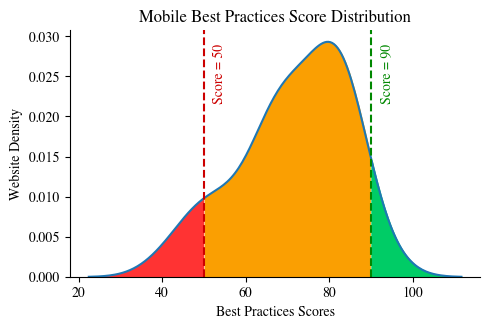

In [10]:
graph = sns.displot(scores, kind="kde", height=3, aspect=5/3)
graph.refline(x=90, color="#080")
graph.refline(x=50, color="#c00")

graph.set(xlabel="Best Practices Scores",
          ylabel="Website Density",
          title="Mobile Best Practices Score Distribution")

axes = graph.axes.flatten()
axes[0].text(92, 0.022, "Score = 90", c="#080", rotation=90)
axes[0].text(52, 0.022, "Score = 50", c="#c00", rotation=90)

kde_x = axes[0].lines[0].get_xdata()
kde_y = axes[0].lines[0].get_ydata()

axes[0].fill_between(kde_x, kde_y, where=(kde_x < 50), color="#f33")
axes[0].fill_between(kde_x, kde_y, where=(kde_x >= 50)
                     & (kde_x <= 90), color="#fa9f02")
axes[0].fill_between(kde_x, kde_y, where=(kde_x > 90), color="#0c6")

plt.savefig(f"results/{STRATEGY}_{CATEGORY}.pdf", bbox_inches="tight")
plt.show()